In [1]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
 
# Load training and test data into dataframes
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


Using TensorFlow backend.


In [2]:
#TO DO: Convert y_train and y_test to categorical format
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
 
# TODO: Split original training data to sub-training (80%) and validation data (20%)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.20)

In [3]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
 
# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255
 
# TO DO: Prepare the test images as above
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255
 
# TO DO: Prepare the validation images as above
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
 
cnn3 = Sequential()

cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(.2))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(.2))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(.2))

cnn3.add(Flatten())
cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(.3))
cnn3.add(Dense(10, activation='softmax'))

cnn3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)        

In [5]:
cnn3.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [24]:
from keras.preprocessing.image import ImageDataGenerator
 
#TO DO: Define ImageDataGenerator
gen = ImageDataGenerator(rescale=1./255,
                         rotation_range=40,
                         zoom_range=0.2,
                         width_shift_range=0.2,
                         height_shift_range=0.2,)
batches = gen.flow(X_train, Y_train, batch_size=256)
val_batches = gen.flow(X_val, Y_val, batch_size=256)
 
history3 = cnn3.fit_generator(batches, steps_per_epoch=48000//256, epochs=50,
                    validation_data=val_batches, validation_steps=12000//256)
 

#TO DO: Evaluate results on the test set and print the results.
score3 =  cnn3.evaluate(X_test, Y_test)

Epoch 1/50
187/187 [==============================] - 18s 95ms/step - loss: 1.4042 - accuracy: 0.4963 - val_loss: 1.0476 - val_accuracy: 0.6203
Epoch 2/50
187/187 [==============================] - 18s 98ms/step - loss: 1.1213 - accuracy: 0.5821 - val_loss: 0.8859 - val_accuracy: 0.6540
Epoch 3/50
187/187 [==============================] - 19s 100ms/step - loss: 1.0440 - accuracy: 0.6130 - val_loss: 0.8352 - val_accuracy: 0.6773
Epoch 4/50
187/187 [==============================] - 18s 96ms/step - loss: 0.9949 - accuracy: 0.6297 - val_loss: 0.8485 - val_accuracy: 0.6762
Epoch 5/50
187/187 [==============================] - 18s 95ms/step - loss: 0.9672 - accuracy: 0.6393 - val_loss: 0.7801 - val_accuracy: 0.6960
Epoch 6/50
187/187 [==============================] - 18s 95ms/step - loss: 0.9465 - accuracy: 0.6468 - val_loss: 0.8373 - val_accuracy: 0.6912
Epoch 7/50
187/187 [==============================] - 18s 95ms/step - loss: 0.9255 - accuracy: 0.6575 - val_loss: 0.7851 - val_accuracy

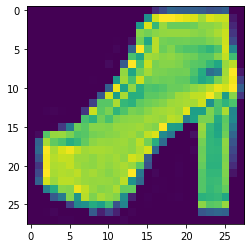

In [29]:
import matplotlib.pyplot as plt
test_im = X_train[200]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

In [28]:
cnn3.evaluate(X_val, Y_val)

12000/12000 [==============================] - 1s 61us/step


[201.25557932535807, 0.2397499978542328]

/Users/mateusz.kuzmik/university/aml01/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  


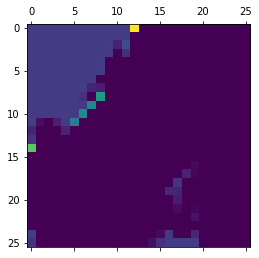

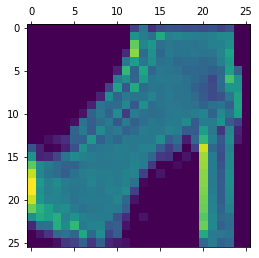

In [31]:
from keras import models
# extracts the outputs of the top 8 layers
layer_outputs = [layer.output for layer in cnn3.layers[:8]]
 
# creates a model that will return these outputs, given the model input
activation_model = models.Model(input=cnn3.input, output=layer_outputs)
 
# returns a list of Numpy arrays: one array per layer activation
activations = activation_model.predict(test_im.reshape(1,28,28,1))
 
# activation of the 1st convolution layer
first_layer_activation = activations[0]
 
# display the 3rd channel of the activation of the 1st layer of the original model
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
 
# display the 6th channel of the activation of the 1st layer of the original model
plt.matshow(first_layer_activation[0, :, :, 6], cmap='viridis')

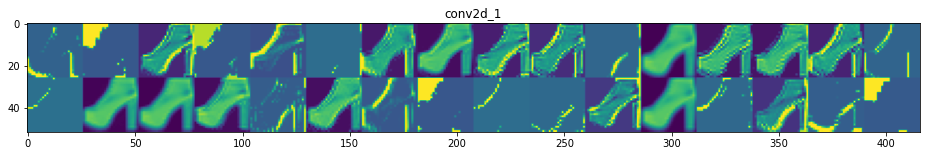

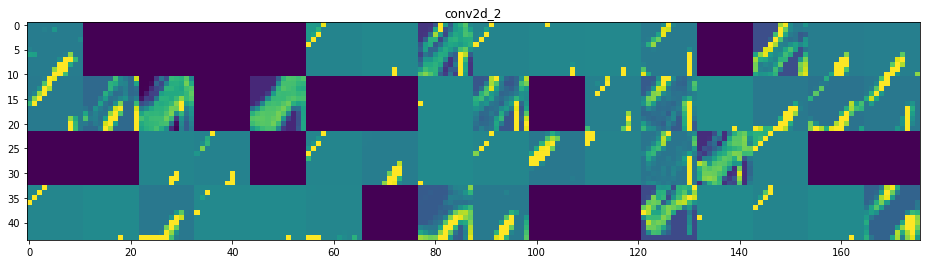

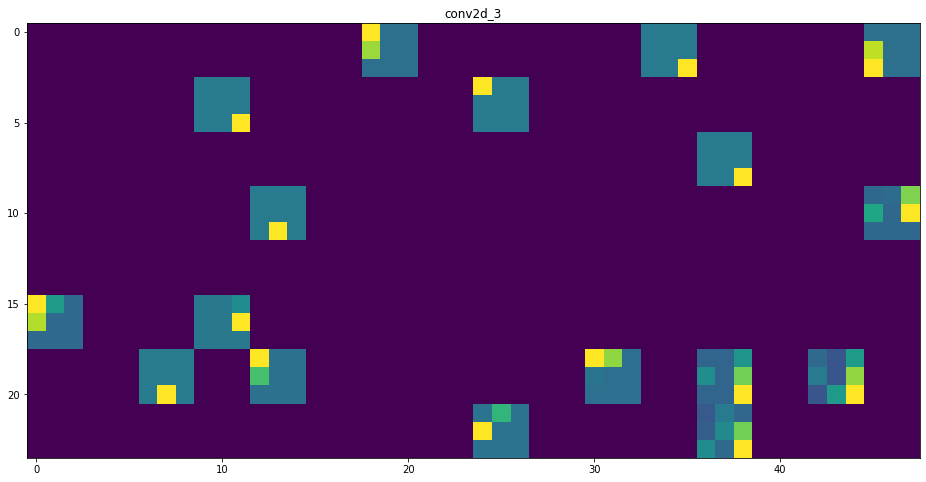

In [33]:
layer_names = []
for layer in cnn3.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [35]:
from keras.applications.vgg16 import VGG16
 
 
# Note that we are including the densely-connected classifier on top;
model = VGG16(weights='imagenet')   

553467904/553467096 [==============================] - 184s 0us/step


In [37]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
 
# The local path to our target image
img_path = 'creative_commons_elephant.jpg'
 
# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))
 
# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)
 
# We add a dimension to transform our array into a "batch" of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)
 
# Finally we preprocess the batch (this does channel-wise color normalization)
x = preprocess_input(x)
 
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 1us/step
Predicted: [('n02504458', 'African_elephant', 0.909421), ('n01871265', 'tusker', 0.086182885), ('n02504013', 'Indian_elephant', 0.0043545826)]


In [42]:
np.argmax(preds[0])

386

In [56]:
import tensorflow as tf

K = tf.keras.backend
# This is the "african elephant" entry in the prediction vector
african_elephant_output = model.output[:, 386]
 
# The is the output feature map of the `block5_conv3` layer, the last convolutional layer in VGG16
last_conv_layer = model.get_layer('block5_conv3')
 
# This is the gradient of the "african elephant" class with regard to the output feature map of `block5_conv3`
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
 
# This is a vector of shape (512,), where each entry is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))
 
# This function allows us to access the values of the quantities we just defined: `pooled_grads` and the output feature map of `block5_conv3`, given a sample image
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
 
# These are the values of these two quantities, as Numpy arrays, given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([x])
 
# We multiply each channel in the feature map array by "how important this channel is" with regard to the elephant class
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
 
# The channel-wise mean of the resulting feature map is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

RuntimeError: tf.gradients is not supported when eager execution is enabled. Use tf.GradientTape instead.

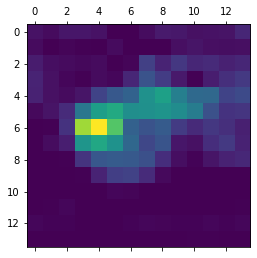

In [58]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [60]:
import cv2
 
# We use cv2 to load the original image
img = cv2.imread(img_path)
 
# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
 
# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
 
# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
 
# 0.4 here is a heatmap intensity factor
superimposed_img = heatmap * 0.4 + img
 
# Save the image to disk
cv2.imwrite('elephant_cam.jpg', superimposed_img)

True